In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
cln = ['area', 'perimeter', 'compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'Class'] 

df = pd.read_csv('wheat-seeds.csv', names=cln, engine='pyarrow')
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (210, 8)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'Class']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 n

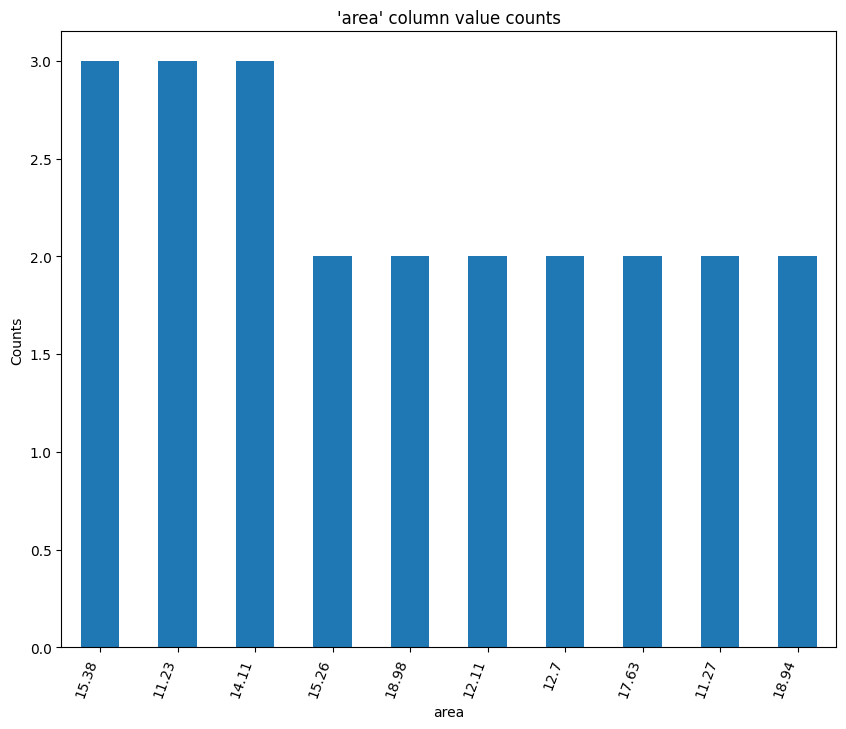

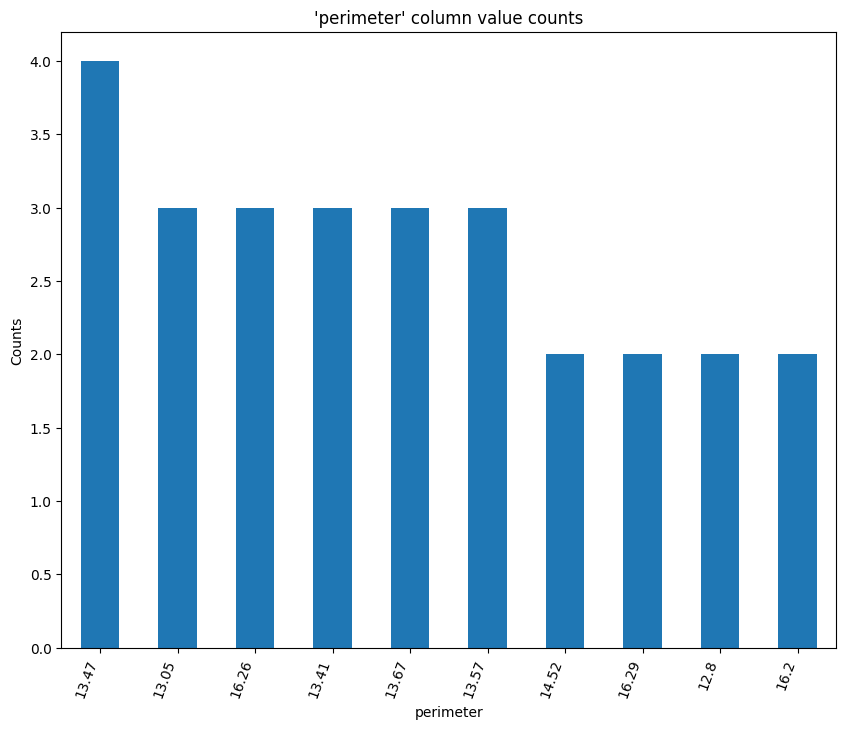

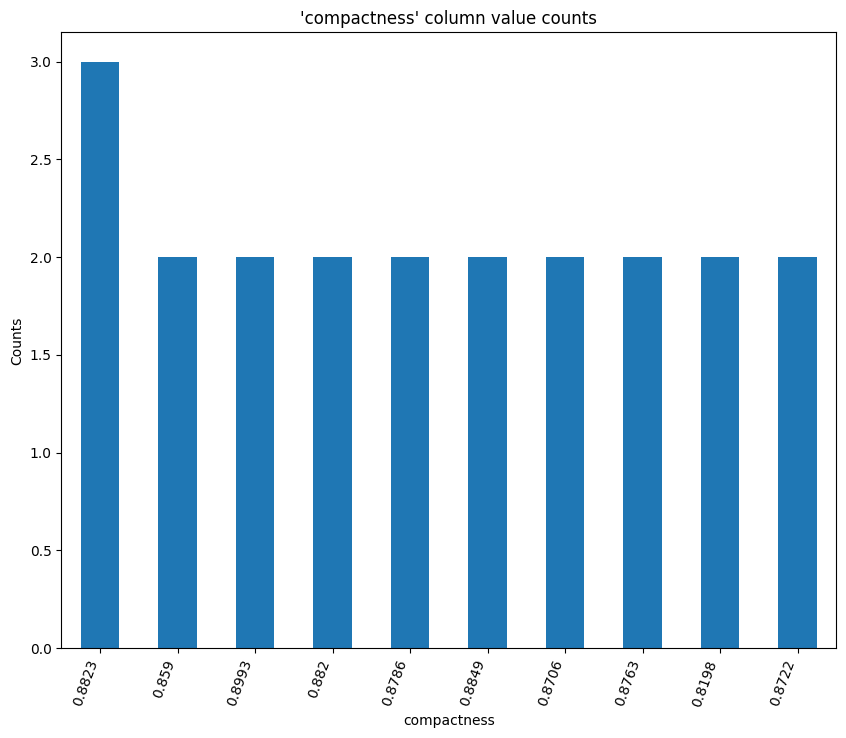

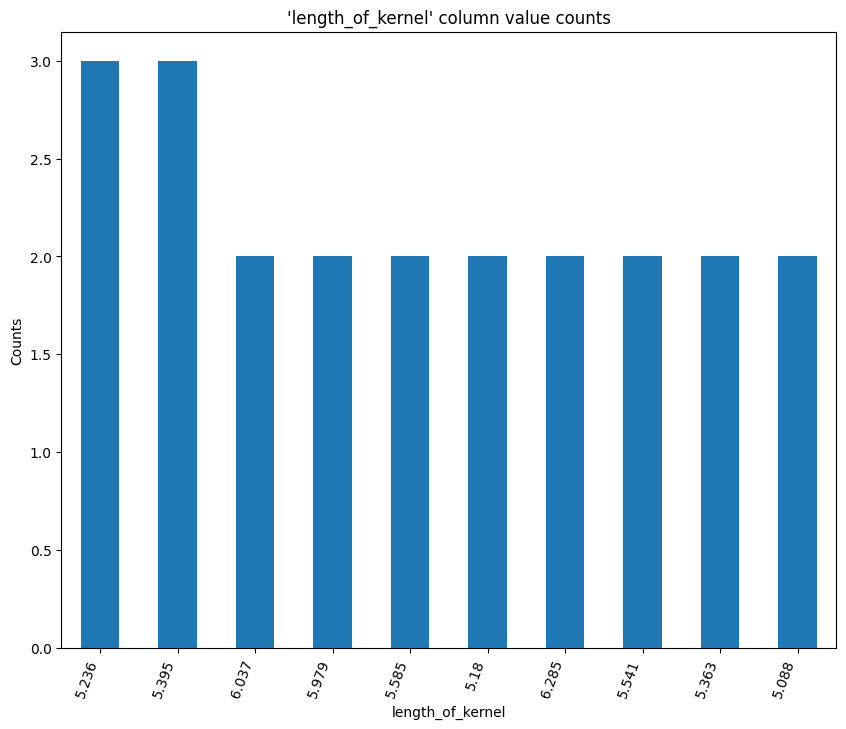

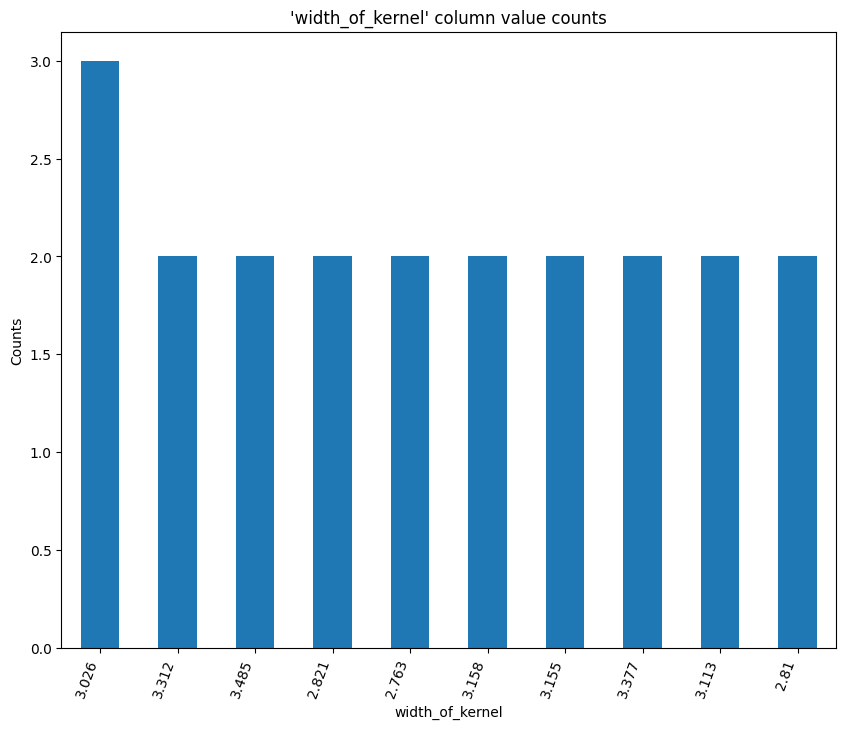

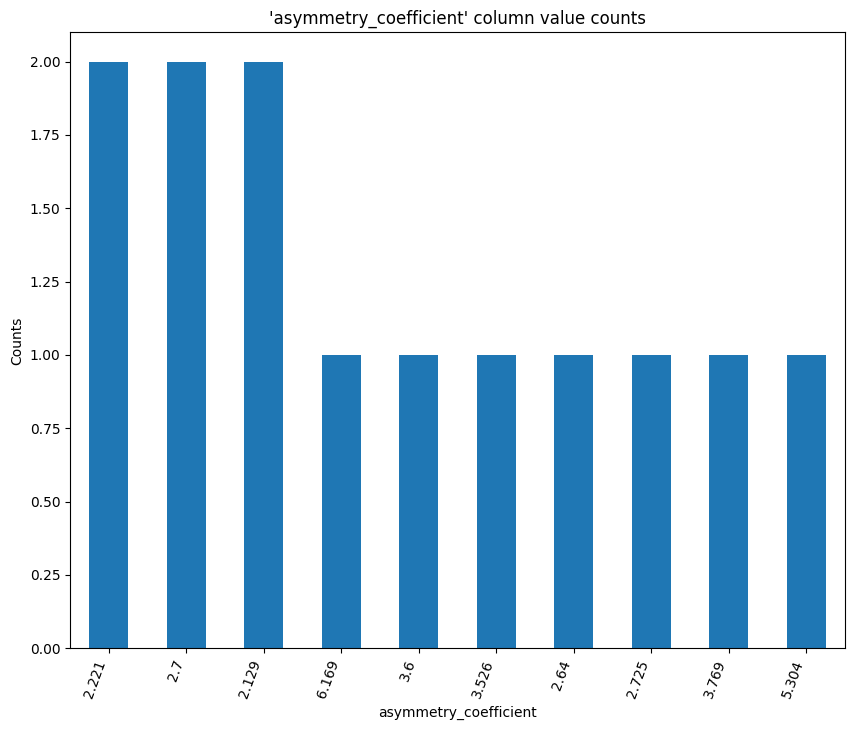

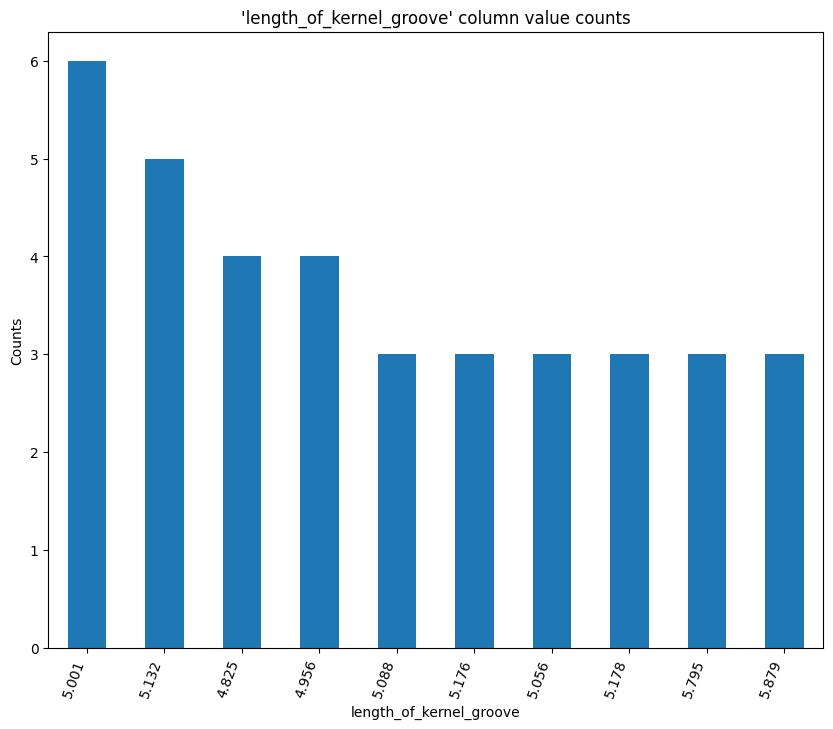

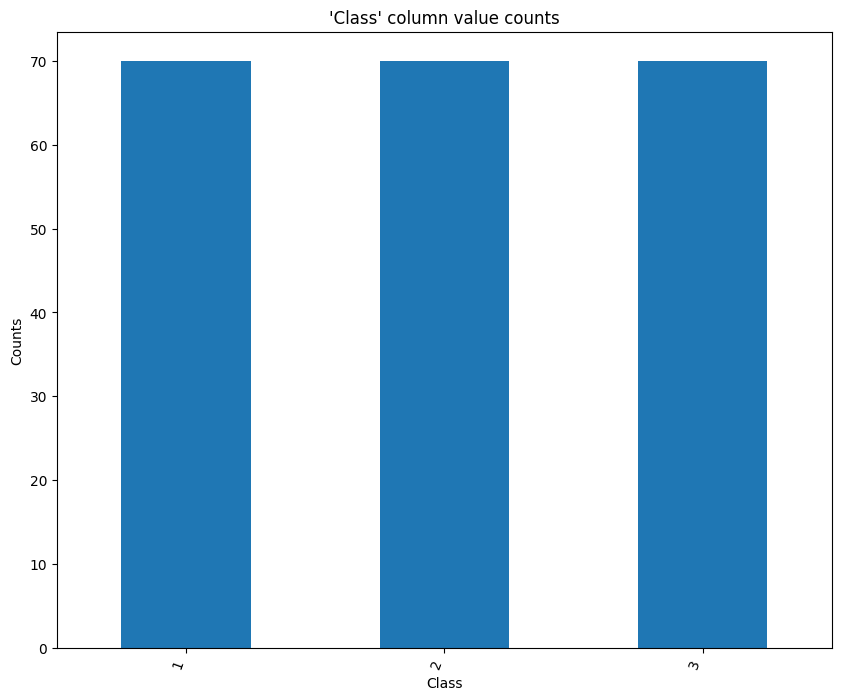

In [5]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

[1 2 3]
Class
1    70
2    70
3    70
Name: count, dtype: int64


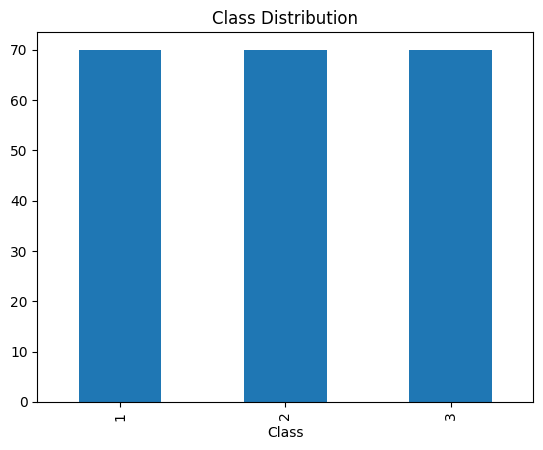

In [7]:
# Unique
cl = df[['Class']]
for col in cl.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].unique())
    print(df[col].value_counts())
    df['Class'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.show() 

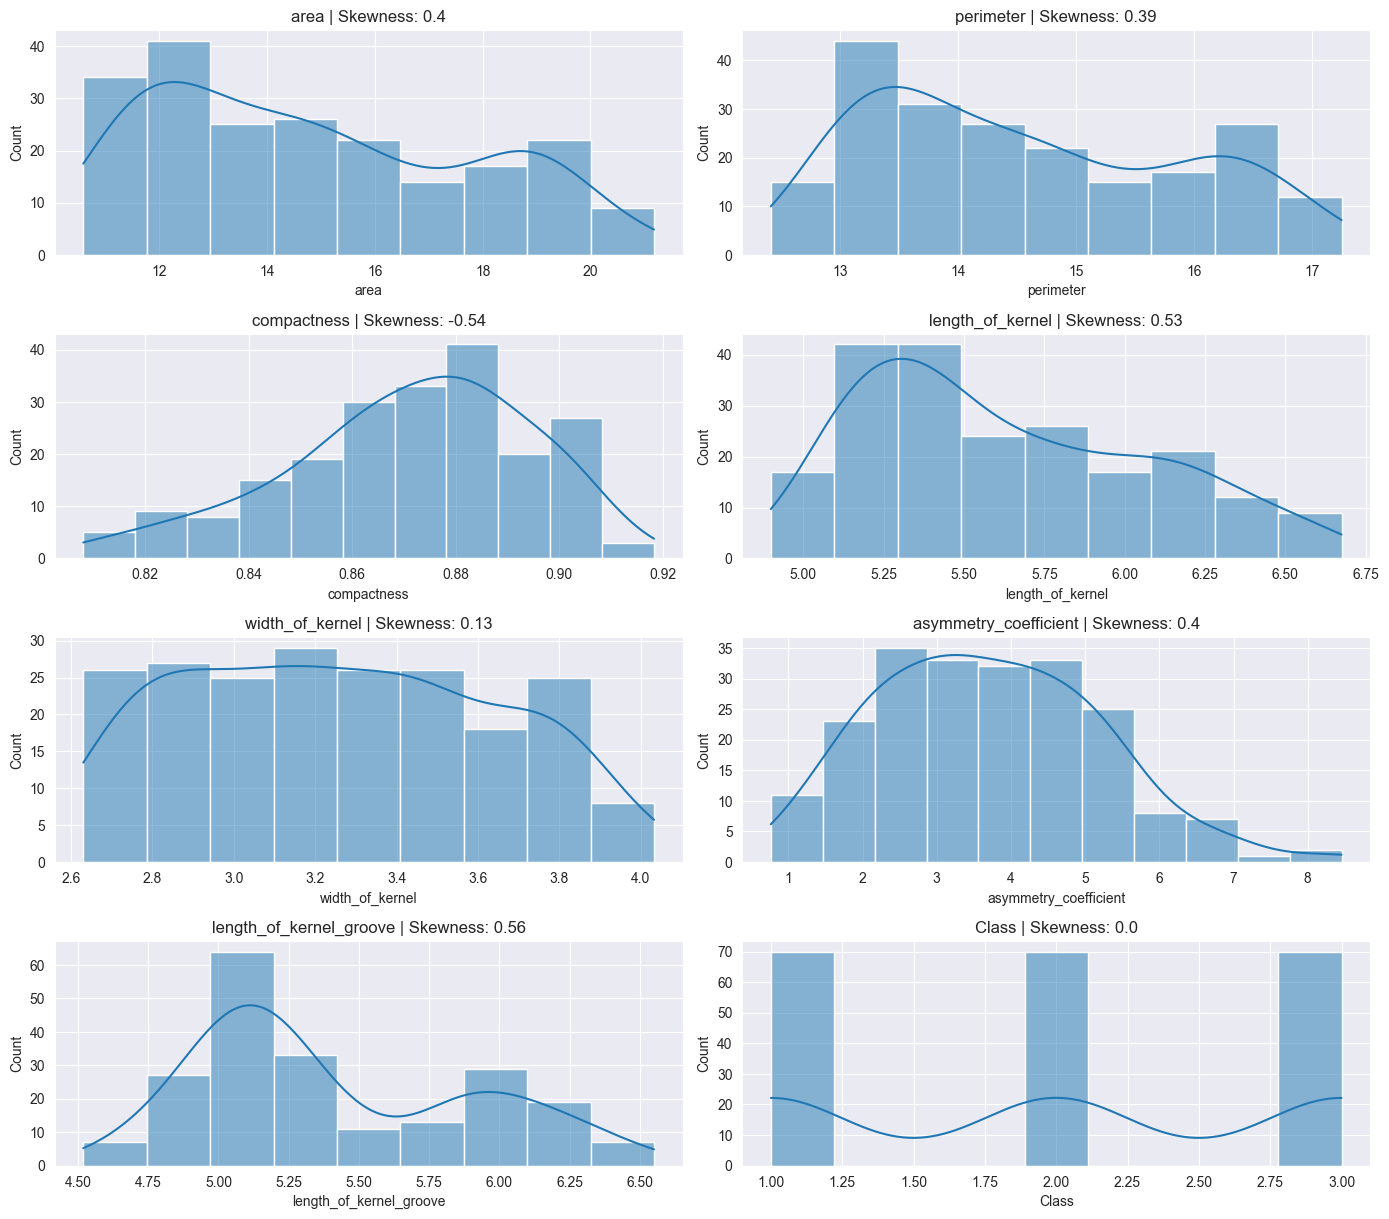

In [8]:
# Kernel Density Plot for understanding variance in the dataset
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int", "float"]).columns 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## LogisticRegression

Dataset shape: (210, 7)
Feature names: Index(['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove'], dtype='object')
Number of classes: 3
Class distribution: [ 0 70 70 70]

X Train shape: (168, 7)
Y Train shape: (168,)
X Test shape: (42, 7)
Y Test shape: (42,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 0.9048
Accuracy train set: 0.9405

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       1.00      1.00      1.00        14
           3       0.88      0.88      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42


Classification

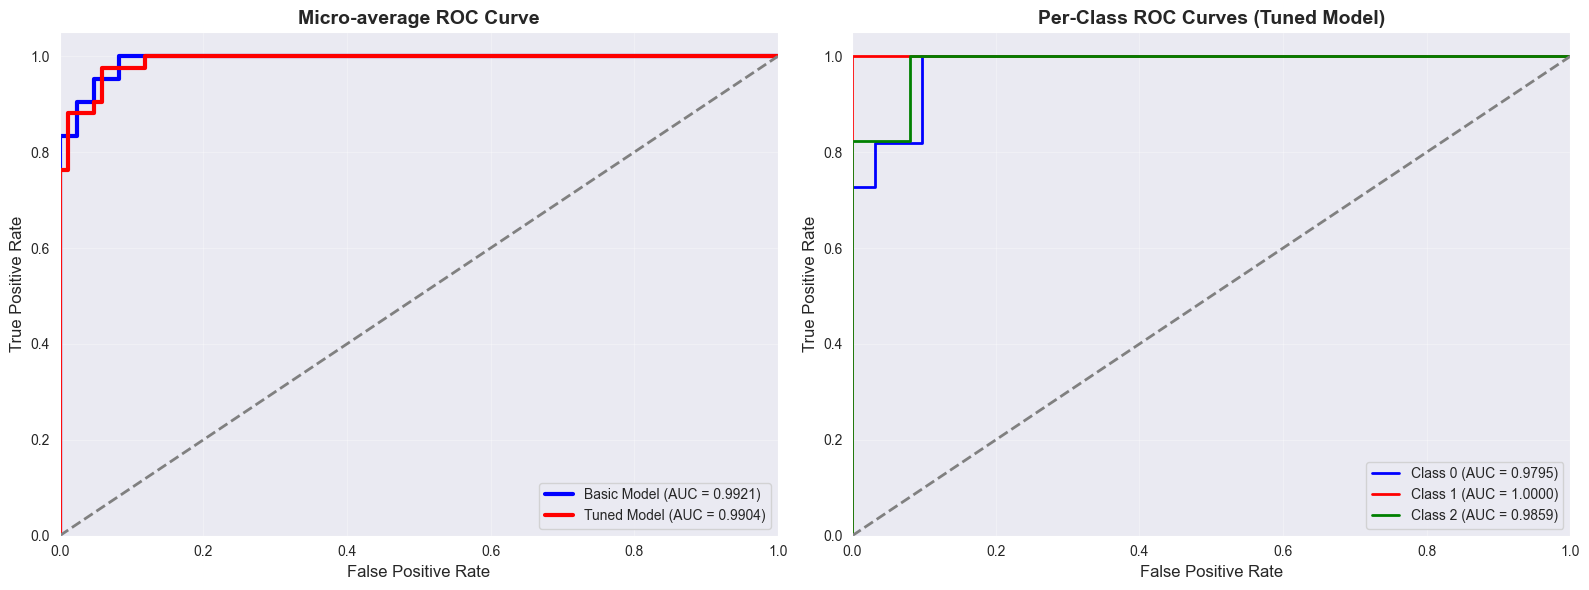

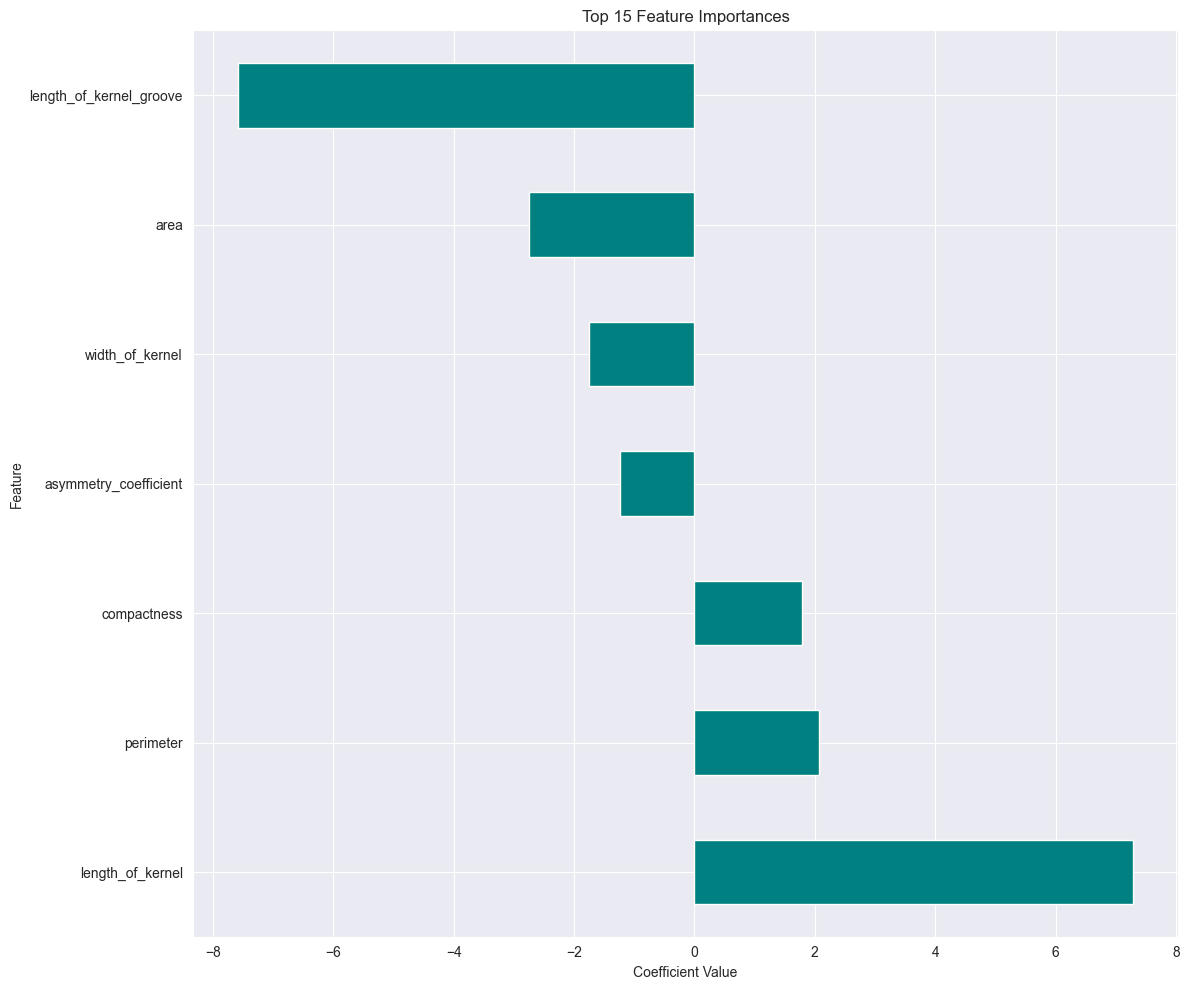

--- Top 10 Most Important Features ---
                         Coefficient
length_of_kernel            7.290829
perimeter                   2.070457
compactness                 1.789594
asymmetry_coefficient      -1.236409
width_of_kernel            -1.759824
area                       -2.740563
length_of_kernel_groove    -7.589772
--- Bottom 10 Least Important Features ---
                         Coefficient
length_of_kernel            7.290829
perimeter                   2.070457
compactness                 1.789594
asymmetry_coefficient      -1.236409
width_of_kernel            -1.759824
area                       -2.740563
length_of_kernel_groove    -7.589772
-------------------------------------------------------------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/py

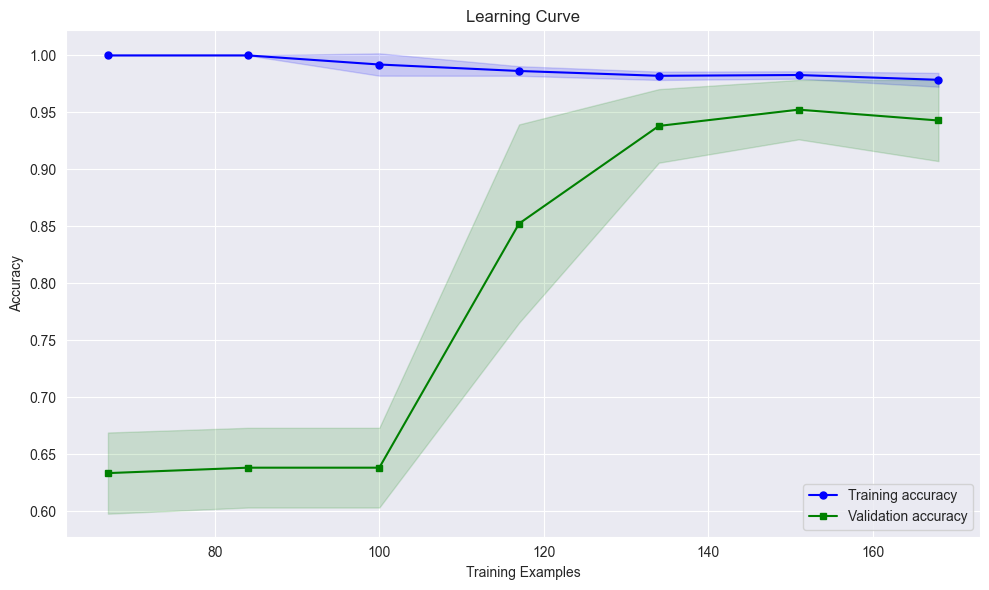

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,3


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,1


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,3


In [12]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],                               # Regularization type
    'classifier__solver': ['liblinear', 'saga'],                 # Algorithm to use
    'classifier__max_iter': [10000, 50000, 100000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']      # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))
print("-" * 127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Basic Model Accuracy Pipeline: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
cv_scores_basic_pipe = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_lr}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_pipe}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_grid}\n")

print(f"Basic Model Average CV Score LR:     {cv_scores_basic_lr.mean():.4f} ± {cv_scores_basic_lr.std():.4f}")
print(f"Basic Model Average CV Score Pipe:  {cv_scores_basic_pipe.mean():.4f} ± {cv_scores_basic_pipe.std():.4f}")
print(f"Tuned Model Average CV Score Grid:  {cv_scores_tuned_grid.mean():.4f} ± {cv_scores_tuned_grid.std():.4f}")
print("-" * 127)  

from sklearn.preprocessing import label_binarize 

# Simplified multiclass ROC curve plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get number of classes
n_classes = len(np.unique(y_test))

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if n_classes == 2:
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

# Get predictions
y_prob_basic = lr.predict_proba(X_test)
y_prob_tuned = pipeline.predict_proba(X_test)

# Calculate micro-average ROC
fpr_basic_micro, tpr_basic_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_basic.ravel())
roc_auc_basic_micro = auc(fpr_basic_micro, tpr_basic_micro)

fpr_tuned_micro, tpr_tuned_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_tuned.ravel())
roc_auc_tuned_micro = auc(fpr_tuned_micro, tpr_tuned_micro)

# Plot 1: Micro-average comparison
ax1.plot(fpr_basic_micro, tpr_basic_micro, color='blue', lw=3,
         label=f'Basic Model (AUC = {roc_auc_basic_micro:.4f})')
ax1.plot(fpr_tuned_micro, tpr_tuned_micro, color='red', lw=3,
         label=f'Tuned Model (AUC = {roc_auc_tuned_micro:.4f})')
ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('Micro-average ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Per-class ROC for tuned model
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_tuned[:, i])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'Class {i} (AUC = {roc_auc:.4f})')

ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('Per-Class ROC Curves (Tuned Model)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('multiclass_roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

"""
# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()
""" 

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())  

## AdaBoostClassifier

Dataset shape: (210, 7)
Feature names: Index(['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove'], dtype='object')
Number of classes: 3
Class distribution: [ 0 70 70 70]

X Train shape: (168, 7)
Y Train shape: (168,)
X Test shape: (42, 7)
Y Test shape: (42,)
-------------------------------------------------------------------------------------------------------------------------------

--- Basic AdaBoost Model ---
Accuracy test set: 0.8333
Accuracy train set: 0.9405

 --- Classification Report: ---
Classification Report test set:
               precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       1.00      1.00      1.00        14
           3       0.86      0.71      0.77        17

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42


Classif

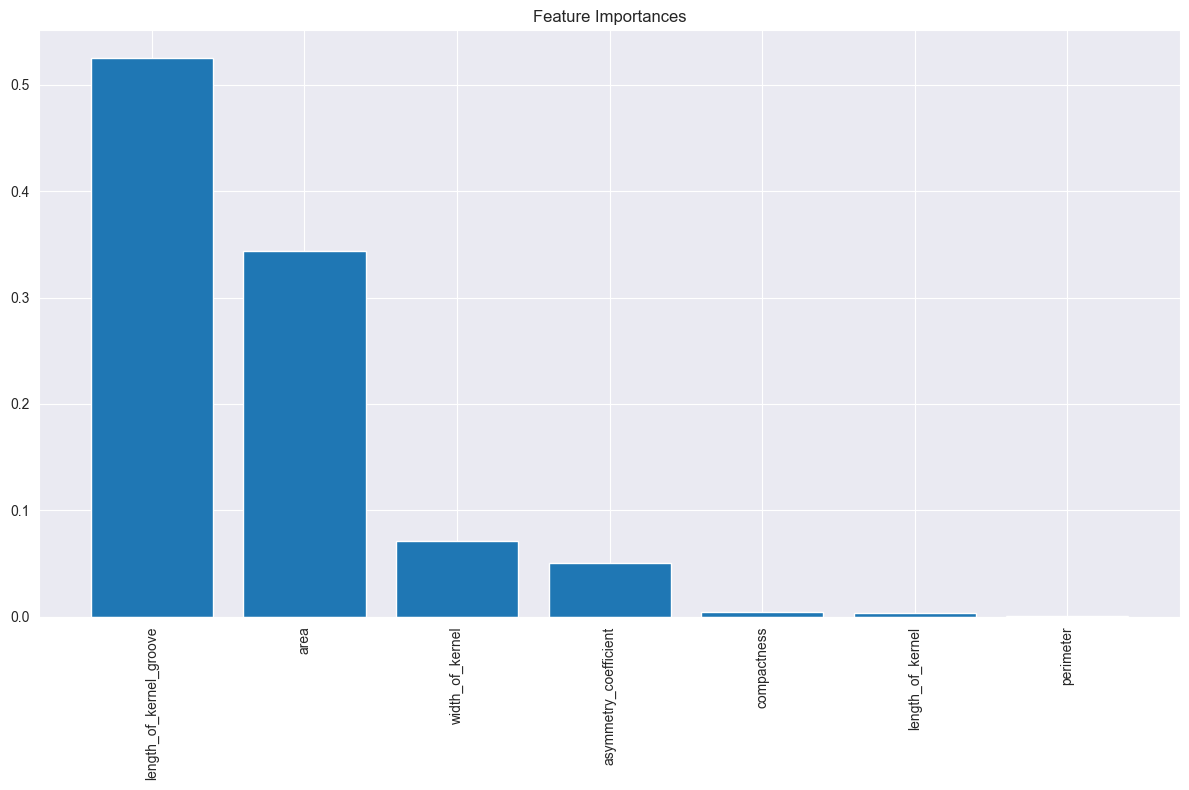


--- Confusion Matrix ---


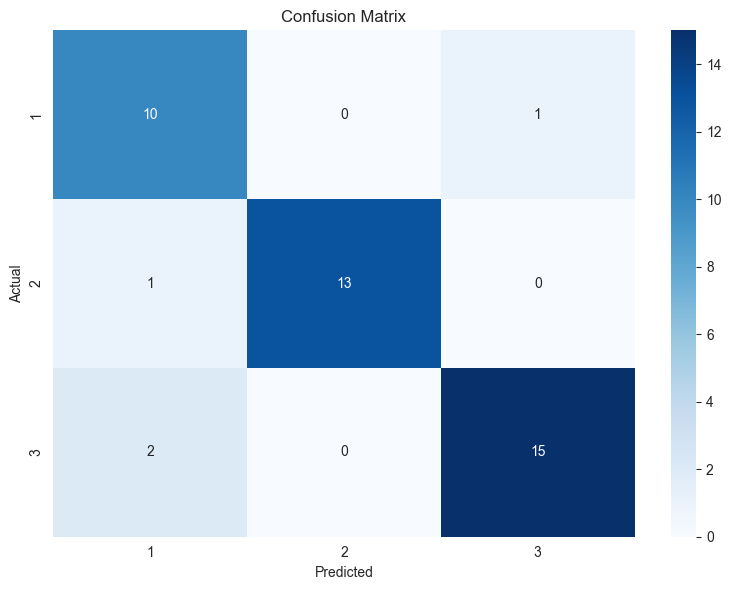

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


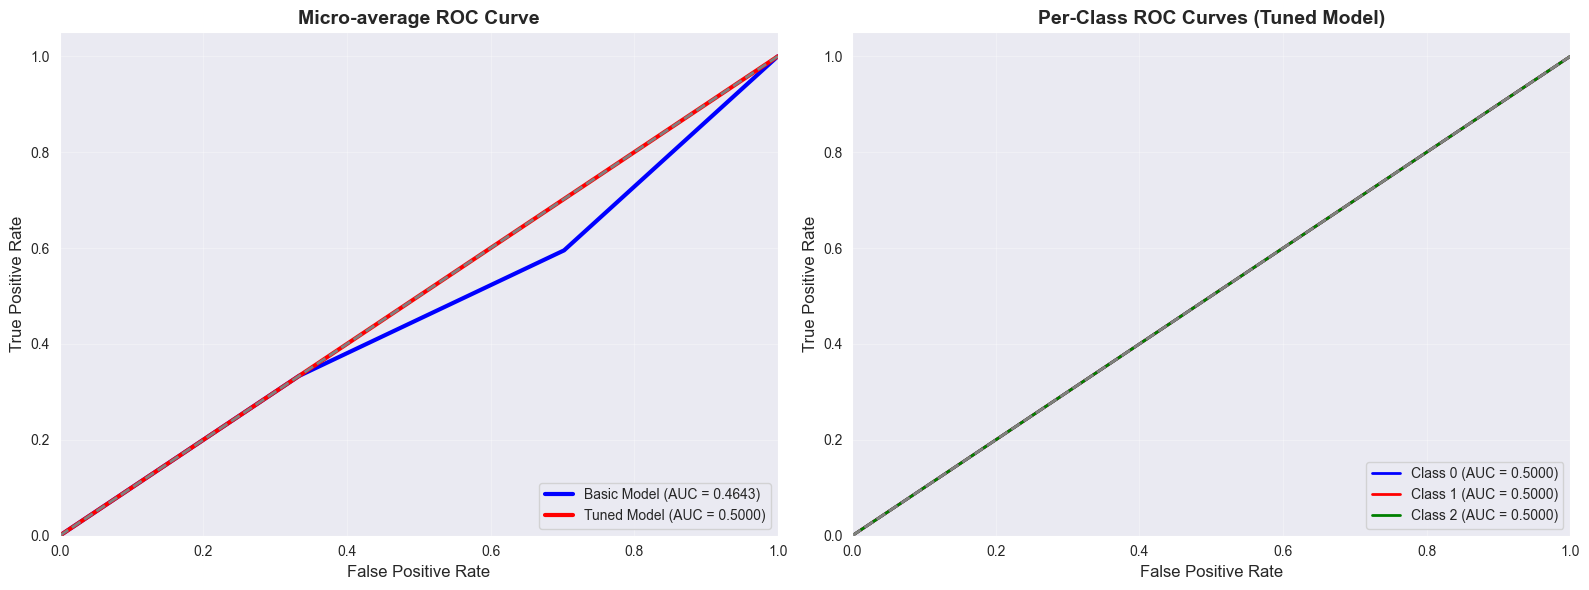


--- Learning Curve ---


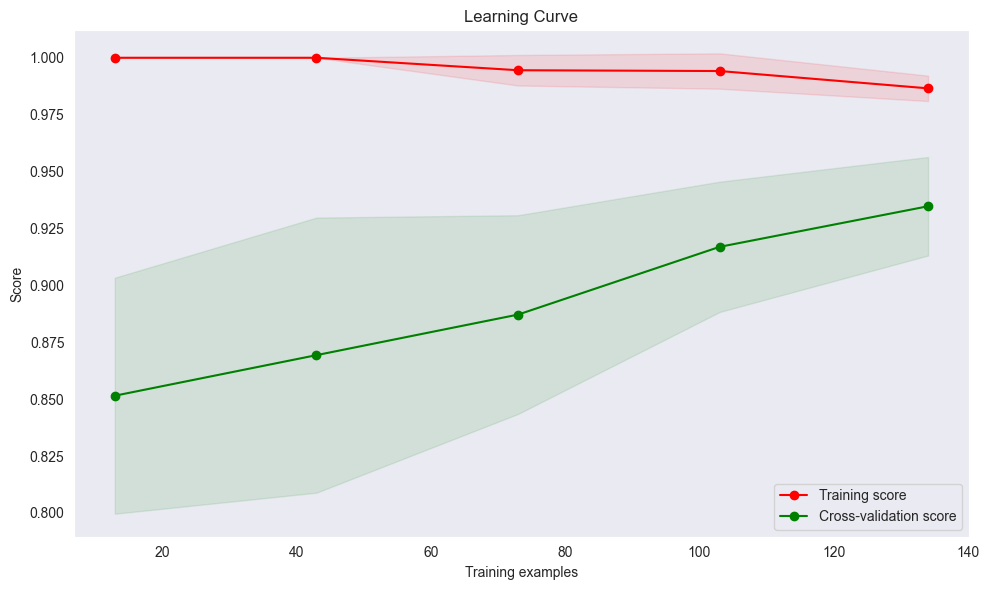


--- Effect of Learning Rate ---


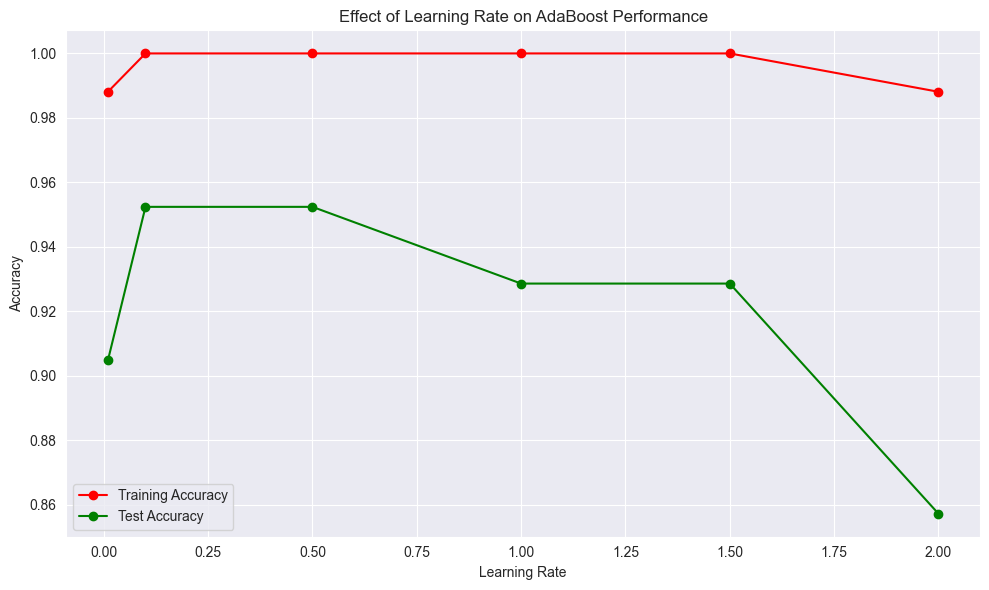


--- Effect of Number of Estimators ---


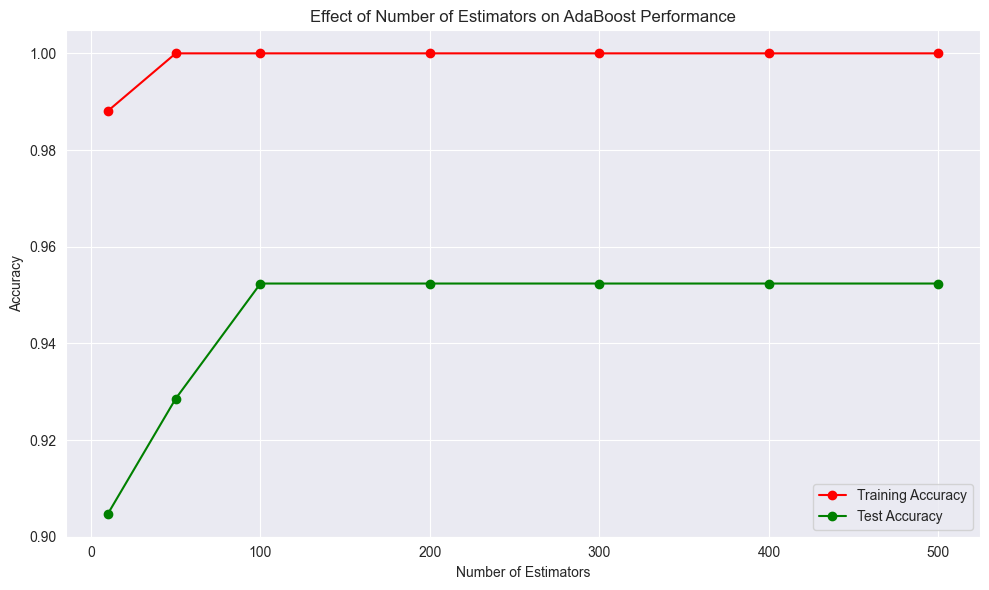


--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 200, 'adaboost__learning_rate': 0.01, 'adaboost__estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Best cross-validation score: 0.9287

Pipeline test accuracy:  0.9286
Pipeline train accuracy: 1.0000

--- Model Comparison ---
Base AdaBoost accuracy: 0.8333
Grid Search tuned accuracy: 0.9048
Pipeline tuned accuracy: 0.9286

Basic Model Logistic Regression Cross-Validation Scores: [0.9047619  0.92857143 0.95238095 0.95238095 0.71428571]
Basic Model Pipeline Cross-Validation Scores: [0.9047619  0.92857143 0.95238095 0.97619048 0.85714286]
Tuned Model Grid Search Cross-Validation Scores: [0.9047619  0.92857143 0.95238095 0.97619048 0.80952381]

Basic Model Average CV Score ADA:      0.8905 ± 0.0898
Basic Model Average CV Score Pipe ADA: 0.9238 ± 0.0410
Tuned Model Average CV Score Grid ADA: 0.9143 ± 0.0575
-------------------------------------------------------------------------------------

In [17]:
# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("\n--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42)
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\n --- Classification Report: ---")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Grid search for hyperparameter tuning
print("\n--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("\n--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# confusion matrix 
def plot_confusion_matrix(y_true, y_pred, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    
    # If classes not provided, determine them automatically
    if classes is None:
        classes = sorted(set(y_true) | set(y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

print("\n--- Confusion Matrix ---")
plot_confusion_matrix(y_test, y_pred_grid)

"""
# ROC curve
def plot_roc_curve(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

print("\n--- ROC Curve ---")
plot_roc_curve(best_model, X_test_scaled, y_test)
""" 

def plot_roc_curve(model, X, y):
    # Simplified multiclass ROC curve plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Get number of classes
    n_classes = len(np.unique(y_test))
    
    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    if n_classes == 2:
        y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))
    
    # Get predictions
    y_prob_basic = base_model.predict_proba(X_test)
    y_prob_tuned = best_model.predict_proba(X_test)
    
    # Calculate micro-average ROC
    fpr_basic_micro, tpr_basic_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_basic.ravel())
    roc_auc_basic_micro = auc(fpr_basic_micro, tpr_basic_micro)
    
    fpr_tuned_micro, tpr_tuned_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_tuned.ravel())
    roc_auc_tuned_micro = auc(fpr_tuned_micro, tpr_tuned_micro) 

    # Plot 1: Micro-average comparison
    ax1.plot(fpr_basic_micro, tpr_basic_micro, color='blue', lw=3,
             label=f'Basic Model (AUC = {roc_auc_basic_micro:.4f})')
    ax1.plot(fpr_tuned_micro, tpr_tuned_micro, color='red', lw=3,
             label=f'Tuned Model (AUC = {roc_auc_tuned_micro:.4f})')
    ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.set_title('Micro-average ROC Curve', fontsize=14, fontweight='bold')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Per-class ROC for tuned model
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_tuned[:, i])
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                 label=f'Class {i} (AUC = {roc_auc:.4f})')
    
    ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate', fontsize=12)
    ax2.set_ylabel('True Positive Rate', fontsize=12)
    ax2.set_title('Per-Class ROC Curves (Tuned Model)', fontsize=14, fontweight='bold')
    ax2.legend(loc='lower right')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    #plt.savefig('multiclass_roc_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_roc_curve(best_model, X_test_scaled, y_test) 

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("\n--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("\n--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}\n")

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_ada = cross_val_score(base_model, X, y, cv=5, scoring='accuracy')
cv_scores_basic_ada_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_ada_grid = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_ada}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_ada_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_ada_grid}\n")

print(f"Basic Model Average CV Score ADA:      {cv_scores_basic_ada.mean():.4f} ± {cv_scores_basic_ada.std():.4f}")
print(f"Basic Model Average CV Score Pipe ADA: {cv_scores_basic_ada_grid.mean():.4f} ± {cv_scores_basic_ada_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid ADA: {cv_scores_tuned_ada_grid.mean():.4f} ± {cv_scores_tuned_ada_grid.std():.4f}")
print("-" * 127) 

# Print final classification report
print("\nFinal Classification Report:")
print(f"Base AdaBoost accuracy:\n {classification_report(y_test, y_pred)}\n")
print(f"Grid Search tuned accuracy:\n {classification_report(y_test, y_pred_grid)}\n")
print(f"Pipeline tuned accuracy:\n {classification_report(y_test, y_pred_pipeline)}")

## RandomForestClassifier

In [18]:
df['Class'].unique()

array([1, 2, 3])

Dataset shape: (210, 7)
Feature names: Index(['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove'], dtype='object')
Number of classes: 3
Class distribution: [ 0 70 70 70]

X Train shape: (168, 7)
Y Train shape: (168,)
X Test shape: (42, 7)
Y Test shape: (42,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.8333
Accuracy Train set: 1.0000
Classification Report:
Classification Report Test: 
               precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       1.00      1.00      1.00        14
           3       0.86      0.71      0.77        17

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42
 

Classifica

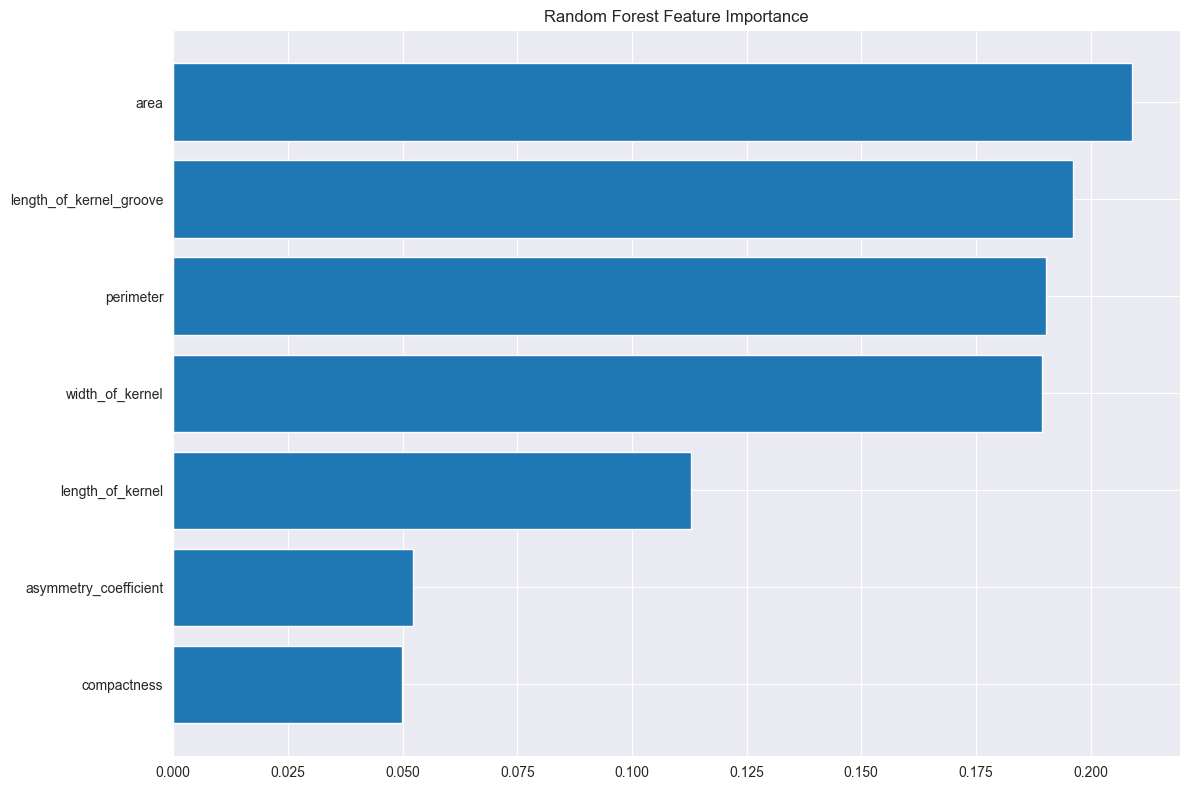

Cross-validation scores: [0.97058824 0.88235294 0.94117647 0.93939394 0.96969697]
Mean CV accuracy: 0.9406
Standard deviation: 0.0321
-------------------------------------------------------------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


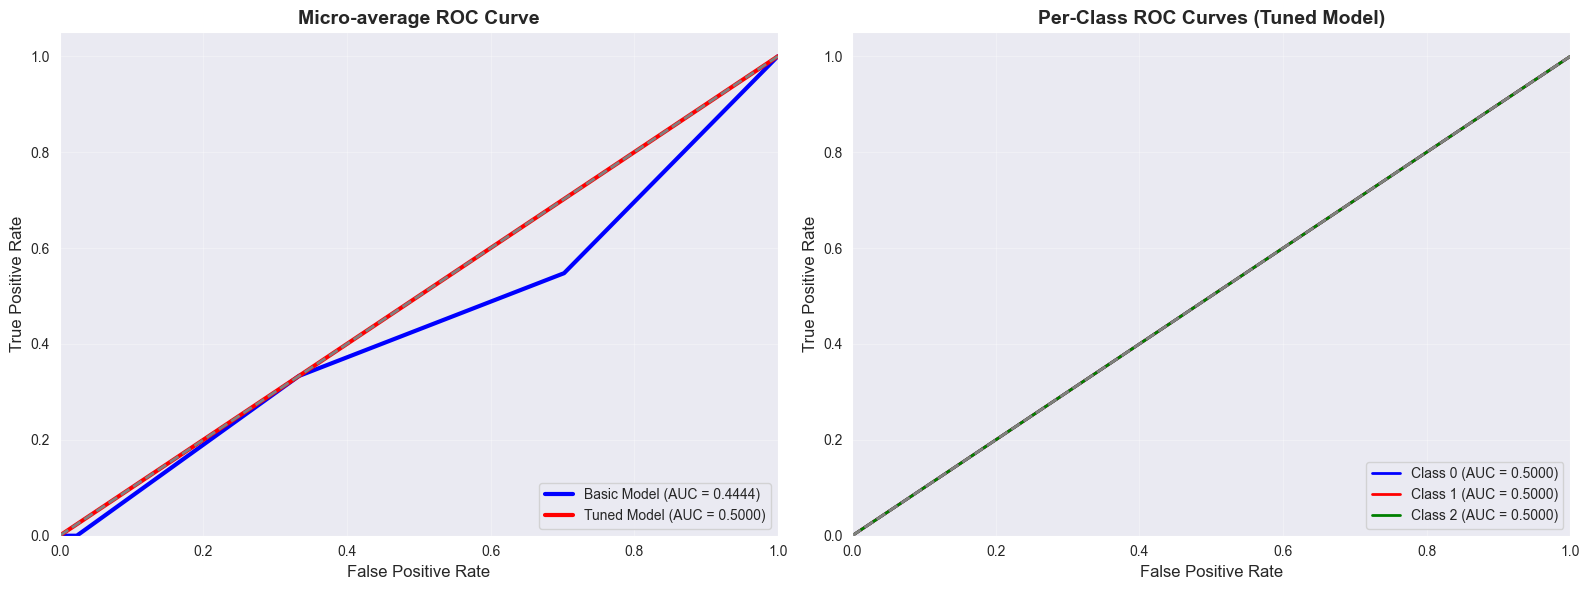

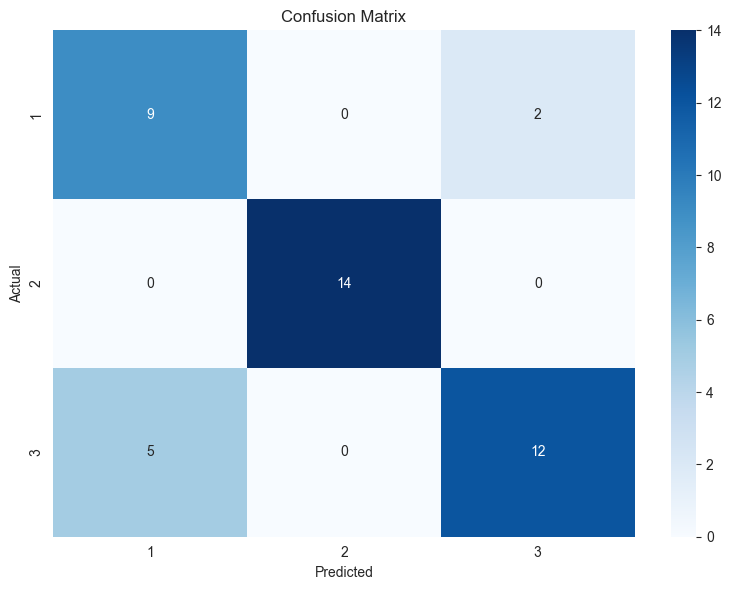

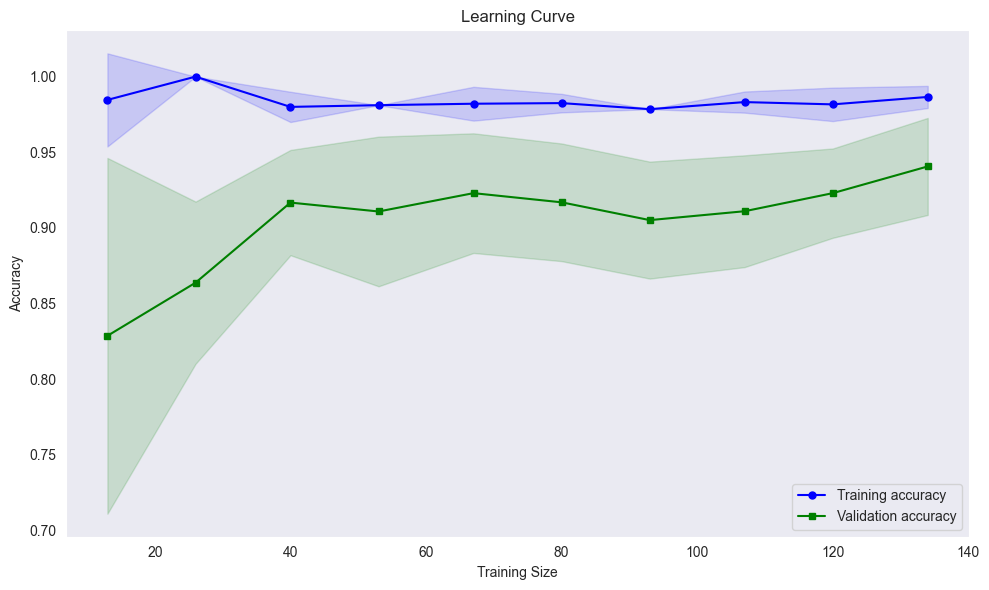

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 80
Fine-tuned accuracy: 0.9406
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 80}
Accuracy Test: 0.8333
Accuracy Train: 0.9940
Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       1.00      1.00      1.00        14
           3       0.86      0.71      0.77        17

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42
 

Classification Report Train: 
               precision    recall  f1-score   support

           1       1.00      0.98 

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,3


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,3


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,prediction
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3
84,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,2
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,3


In [20]:
# RandomForest Tuning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.datasets import load_breast_cancer

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['1', '2', '3']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 7. ROC Curve and AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Simplified multiclass ROC curve plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get number of classes
n_classes = len(np.unique(y_test))

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if n_classes == 2:
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

# Get predictions
y_prob_basic = rf_base.predict_proba(X_test)
y_prob_tuned = best_grid_model.predict_proba(X_test)

# Calculate micro-average ROC
fpr_basic_micro, tpr_basic_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_basic.ravel())
roc_auc_basic_micro = auc(fpr_basic_micro, tpr_basic_micro)

fpr_tuned_micro, tpr_tuned_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob_tuned.ravel())
roc_auc_tuned_micro = auc(fpr_tuned_micro, tpr_tuned_micro)

# Plot 1: Micro-average comparison
ax1.plot(fpr_basic_micro, tpr_basic_micro, color='blue', lw=3,
         label=f'Basic Model (AUC = {roc_auc_basic_micro:.4f})')
ax1.plot(fpr_tuned_micro, tpr_tuned_micro, color='red', lw=3,
         label=f'Tuned Model (AUC = {roc_auc_tuned_micro:.4f})')
ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('Micro-average ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Per-class ROC for tuned model
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_tuned[:, i])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'Class {i} (AUC = {roc_auc:.4f})')

ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('Per-Class ROC Curves (Tuned Model)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('multiclass_roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

"""
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()
""" 

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Basic Model Accuracy Pipeline Grid: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_final):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_rf = cross_val_score(rf_base, X, y, cv=5, scoring='accuracy')
cv_scores_basic_rf_grid = cross_val_score(best_grid_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_rf_grid = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_rf}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_rf_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_rf_grid}\n")

print(f"Basic Model Average CV Score RF:      {cv_scores_basic_rf.mean():.4f} ± {cv_scores_basic_rf.std():.4f}")
print(f"Basic Model Average CV Score Pipe RF: {cv_scores_basic_rf_grid.mean():.4f} ± {cv_scores_basic_rf_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid RF: {cv_scores_tuned_rf_grid.mean():.4f} ± {cv_scores_tuned_rf_grid.std():.4f}")
print("-" * 127)  

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_base, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_final, 3)
display(pipe_model_df.head())  

## Neural Network

In [22]:
# Example 1: Simple Binary Classification with Synthetic Data MLPClassifier
print("EXAMPLE 1: Binary Classification with Synthetic Data")

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification, load_iris

# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("=" * 127)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network
mlp_basic = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',               # ReLU activation function
    solver='adam',                  # Adam optimizer
    alpha=0.0001,                   # L2 regularization parameter
    batch_size='auto',            # Batch size
    learning_rate='constant',       # Learning rate schedule
    learning_rate_init=0.001,       # Initial learning rate
    max_iter=500,                   # Maximum iterations
    random_state=42
)

# Train the model
mlp_basic.fit(X_train_scaled, y_train)

# Make predictions
y_pred_basic = mlp_basic.predict(X_test_scaled)

# Evaluate the model
print(f"Training Accuracy: {mlp_basic.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_basic):.4f}")
print(f"\nNumber of iterations: {mlp_basic.n_iter_}")
print(f"Loss: {mlp_basic.loss_:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic))
print("=" * 127) 

EXAMPLE 1: Binary Classification with Synthetic Data
Dataset shape: (210, 7)
Feature names: Index(['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove'], dtype='object')
Number of classes: 3
Class distribution: [ 0 70 70 70]

X Train shape: (168, 7)
Y Train shape: (168,)
X Test shape: (42, 7)
Y Test shape: (42,)
Training Accuracy: 1.0000
Test Accuracy: 0.9286

Number of iterations: 346
Loss: 0.0151

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       1.00      1.00      1.00        14
           3       0.89      0.94      0.91        17

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42



In [24]:
print("EXAMPLE 2: Multi-class Classification")
# Load the iris dataset
#iris = load_iris()
#X_iris, y_iris = iris.data, iris.target

# Load the dataset (binary classification)
X = df.drop(columns=['Class'], axis=1)
y = df['Class'] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create neural network for multi-class classification
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),   # Two hidden layers with 10 neurons each
    activation='tanh',             # Tanh activation function
    solver='lbfgs',               # L-BFGS solver (good for small datasets)
    alpha=0.01,                   # Higher regularization
    max_iter=1000,
    random_state=42
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
print(f"Training Accuracy: {mlp.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

EXAMPLE 2: Multi-class Classification
Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Confusion Matrix:
[[11  0  0]
 [ 0 14  0]
 [ 0  0 17]]
